Step 1: Imports

In [1]:
! git clone https://github.com/niharikavadapalli/ERA-V1.git

Cloning into 'ERA-V1'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 225 (delta 0), reused 2 (delta 0), pack-reused 220
Receiving objects: 100% (225/225), 1.65 MiB | 7.51 MiB/s, done.
Resolving deltas: 100% (87/87), done.


In [2]:
%cd "/content/ERA-V1/ERA-V1-Session-9"
!pwd

/content/ERA-V1/ERA-V1-Session-9
/content/ERA-V1/ERA-V1-Session-9


In [16]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2

from cifar10.model import Net
from cifar10.backpropogation import test, train
from cifar10.visualize import plot_misclassified_images, plot_network_performance, print_samples, print_data_stats, print_train_log
from cifar10.backpropogation import train_losses, train_acc, test_losses, test_acc, incorrect_examples, incorrect_pred, incorrect_labels
from cifar10.dataset import MyDataset
from cifar10.transform import get_loaders

!pip install torchsummary
from torchsummary import summary

Step 2: Visualize and Prepare Data Transforms

100%|██████████| 170498071/170498071 [00:04<00:00, 41662772.46it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


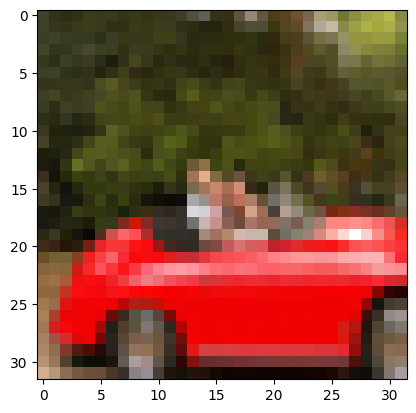

In [4]:
cifar10 =  datasets.CIFAR10('./data', train=True, download=True)
cifar10_val = datasets.CIFAR10('./data', train=False, download=True)
img, label = cifar10[99]
plt.imshow(img)
plt.show()

Step 4: Creating data loaders

In [5]:
SEED = 1

cuda = torch.cuda.is_available()
print("Is cuda available? ", cuda)

#set the seed of the random number generator to a fixed value
torch.manual_seed(SEED)

if cuda:
  torch.cuda.manual_seed(SEED)

train_loader, test_loader = get_loaders(use_cuda=cuda)


Is cuda available?  True


100%|██████████| 170498071/170498071 [00:03<00:00, 48675089.77it/s]


Extracting ../data/cifar-10-python.tar.gz to ../data


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Files already downloaded and verified


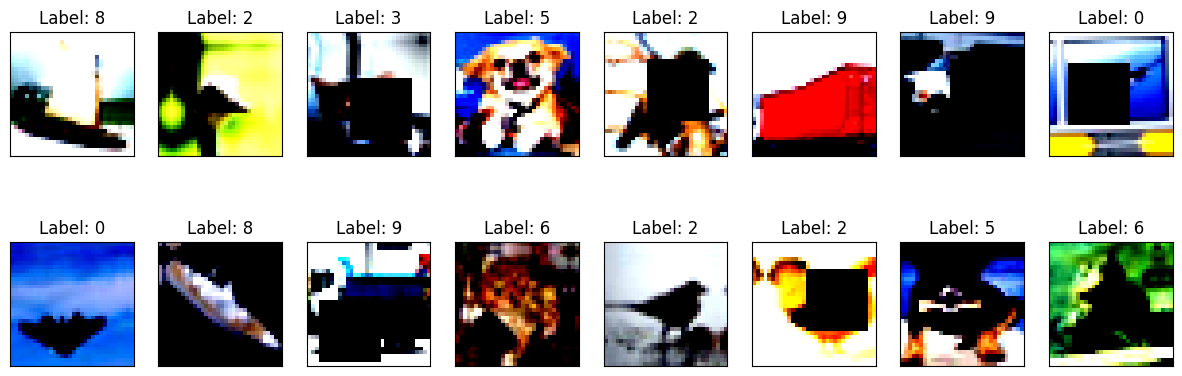

In [6]:
print_samples(train_loader)

Step 5: Data Stats

In [7]:
print_data_stats(train_loader)

{'horse': 5000, 'automobile': 5000, 'deer': 5000, 'ship': 5000, 'airplane': 5000, 'bird': 5000, 'dog': 5000, 'frog': 5000, 'cat': 5000, 'truck': 5000}


Step 6: Model Creation and Display Parameters

In [8]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

model = Net().to(device)
summary(model, input_size=(3,32,32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]             288
            Conv2d-6           [-1, 32, 32, 32]           1,024
       BatchNorm2d-7           [-1, 32, 32, 32]              64
              ReLU-8           [-1, 32, 32, 32]               0
           Dropout-9           [-1, 32, 32, 32]               0
           Conv2d-10           [-1, 32, 32, 32]           9,216
      BatchNorm2d-11           [-1, 32, 32, 32]              64
             ReLU-12           [-1, 32, 32, 32]               0
          Dropout-13           [-1, 32, 32, 32]               0
           Conv2d-14           [-1

Step 7: Training the model

In [9]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.05, patience=5, threshold=0.1, verbose=True)
EPOCHS = 51

train_acc.clear()
test_acc.clear()
train_losses.clear()
test_losses.clear()
incorrect_examples.clear()
incorrect_labels.clear()
incorrect_pred.clear()
learning_rates = []

for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)
    scheduler.step(test_losses[-1])
    learning_rates.append(optimizer.param_groups[0]['lr'])
    print(f"\n current learing rate is {optimizer.param_groups[0]['lr']}")
    print(f"\n last test loss is {test_losses[-1]}")

EPOCH: 0


Loss=1.2733958959579468 Batch_id=390 Accuracy=38.5240: 100%|██████████| 391/391 [00:44<00:00,  8.70it/s]



Test set: Average loss: 1.4523, Accuracy: 4501/10000 (45.0100%)


 current learing rate is 0.01

 last test loss is 1.452338932991028
EPOCH: 1


Loss=1.178593397140503 Batch_id=390 Accuracy=52.2120: 100%|██████████| 391/391 [00:45<00:00,  8.65it/s]



Test set: Average loss: 1.2720, Accuracy: 5671/10000 (56.7100%)


 current learing rate is 0.01

 last test loss is 1.2719777851104737
EPOCH: 2


Loss=1.109086275100708 Batch_id=390 Accuracy=58.6800: 100%|██████████| 391/391 [00:44<00:00,  8.75it/s]



Test set: Average loss: 1.0783, Accuracy: 6219/10000 (62.1900%)


 current learing rate is 0.01

 last test loss is 1.0783035789489746
EPOCH: 3


Loss=0.9122532606124878 Batch_id=390 Accuracy=63.1840: 100%|██████████| 391/391 [00:44<00:00,  8.76it/s]



Test set: Average loss: 0.8439, Accuracy: 7019/10000 (70.1900%)


 current learing rate is 0.01

 last test loss is 0.8439280265808106
EPOCH: 4


Loss=1.1716467142105103 Batch_id=390 Accuracy=66.2900: 100%|██████████| 391/391 [00:44<00:00,  8.80it/s]



Test set: Average loss: 0.8380, Accuracy: 7050/10000 (70.5000%)


 current learing rate is 0.01

 last test loss is 0.8380442378044128
EPOCH: 5


Loss=0.7730362415313721 Batch_id=390 Accuracy=68.6340: 100%|██████████| 391/391 [00:45<00:00,  8.68it/s]



Test set: Average loss: 0.9163, Accuracy: 7008/10000 (70.0800%)


 current learing rate is 0.01

 last test loss is 0.9163336563110351
EPOCH: 6


Loss=0.8748084306716919 Batch_id=390 Accuracy=70.2860: 100%|██████████| 391/391 [00:44<00:00,  8.76it/s]



Test set: Average loss: 0.7922, Accuracy: 7334/10000 (73.3400%)


 current learing rate is 0.01

 last test loss is 0.7921997034072876
EPOCH: 7


Loss=0.740784227848053 Batch_id=390 Accuracy=71.7120: 100%|██████████| 391/391 [00:44<00:00,  8.70it/s]



Test set: Average loss: 0.7648, Accuracy: 7450/10000 (74.5000%)


 current learing rate is 0.01

 last test loss is 0.7647909292221069
EPOCH: 8


Loss=0.7673342227935791 Batch_id=390 Accuracy=72.7880: 100%|██████████| 391/391 [00:44<00:00,  8.78it/s]



Test set: Average loss: 0.7330, Accuracy: 7517/10000 (75.1700%)


 current learing rate is 0.01

 last test loss is 0.7330041590213776
EPOCH: 9


Loss=0.7539153099060059 Batch_id=390 Accuracy=73.6780: 100%|██████████| 391/391 [00:44<00:00,  8.79it/s]



Test set: Average loss: 0.7773, Accuracy: 7384/10000 (73.8400%)


 current learing rate is 0.01

 last test loss is 0.7773344834327698
EPOCH: 10


Loss=0.8420197367668152 Batch_id=390 Accuracy=74.6280: 100%|██████████| 391/391 [00:44<00:00,  8.76it/s]



Test set: Average loss: 0.6931, Accuracy: 7646/10000 (76.4600%)


 current learing rate is 0.01

 last test loss is 0.6930675988197327
EPOCH: 11


Loss=0.7642430067062378 Batch_id=390 Accuracy=75.1940: 100%|██████████| 391/391 [00:44<00:00,  8.78it/s]



Test set: Average loss: 0.6060, Accuracy: 7943/10000 (79.4300%)


 current learing rate is 0.01

 last test loss is 0.6059759590148925
EPOCH: 12


Loss=0.640214204788208 Batch_id=390 Accuracy=75.6680: 100%|██████████| 391/391 [00:44<00:00,  8.83it/s]



Test set: Average loss: 0.6278, Accuracy: 7867/10000 (78.6700%)


 current learing rate is 0.01

 last test loss is 0.6277865407466888
EPOCH: 13


Loss=0.5948001742362976 Batch_id=390 Accuracy=76.5980: 100%|██████████| 391/391 [00:44<00:00,  8.73it/s]



Test set: Average loss: 0.5477, Accuracy: 8136/10000 (81.3600%)


 current learing rate is 0.01

 last test loss is 0.5476945615768433
EPOCH: 14


Loss=0.7143434286117554 Batch_id=390 Accuracy=76.8580: 100%|██████████| 391/391 [00:44<00:00,  8.82it/s]



Test set: Average loss: 0.6663, Accuracy: 7791/10000 (77.9100%)


 current learing rate is 0.01

 last test loss is 0.6662568824768066
EPOCH: 15


Loss=0.7801986336708069 Batch_id=390 Accuracy=77.3540: 100%|██████████| 391/391 [00:44<00:00,  8.73it/s]



Test set: Average loss: 0.5549, Accuracy: 8083/10000 (80.8300%)


 current learing rate is 0.01

 last test loss is 0.5549085299968719
EPOCH: 16


Loss=0.50658118724823 Batch_id=390 Accuracy=77.9780: 100%|██████████| 391/391 [00:44<00:00,  8.74it/s]



Test set: Average loss: 0.5372, Accuracy: 8153/10000 (81.5300%)


 current learing rate is 0.01

 last test loss is 0.5372133618354797
EPOCH: 17


Loss=0.8257570266723633 Batch_id=390 Accuracy=78.4000: 100%|██████████| 391/391 [00:44<00:00,  8.79it/s]



Test set: Average loss: 0.5675, Accuracy: 8073/10000 (80.7300%)


 current learing rate is 0.01

 last test loss is 0.5675360990524292
EPOCH: 18


Loss=0.7576802968978882 Batch_id=390 Accuracy=78.7740: 100%|██████████| 391/391 [00:44<00:00,  8.78it/s]



Test set: Average loss: 0.5688, Accuracy: 8053/10000 (80.5300%)


 current learing rate is 0.01

 last test loss is 0.5688079416275025
EPOCH: 19


Loss=0.6850989460945129 Batch_id=390 Accuracy=79.1140: 100%|██████████| 391/391 [00:44<00:00,  8.75it/s]



Test set: Average loss: 0.4966, Accuracy: 8295/10000 (82.9500%)


 current learing rate is 0.01

 last test loss is 0.4965551799297333
EPOCH: 20


Loss=0.6298916935920715 Batch_id=390 Accuracy=79.4160: 100%|██████████| 391/391 [00:45<00:00,  8.60it/s]



Test set: Average loss: 0.5683, Accuracy: 8131/10000 (81.3100%)


 current learing rate is 0.01

 last test loss is 0.568330622291565
EPOCH: 21


Loss=0.9253700375556946 Batch_id=390 Accuracy=79.8940: 100%|██████████| 391/391 [00:44<00:00,  8.73it/s]



Test set: Average loss: 0.6490, Accuracy: 7851/10000 (78.5100%)


 current learing rate is 0.01

 last test loss is 0.6490377263069153
EPOCH: 22


Loss=0.4762056767940521 Batch_id=390 Accuracy=80.0600: 100%|██████████| 391/391 [00:45<00:00,  8.66it/s]



Test set: Average loss: 0.4752, Accuracy: 8399/10000 (83.9900%)


 current learing rate is 0.01

 last test loss is 0.4752272161960602
EPOCH: 23


Loss=0.4119819104671478 Batch_id=390 Accuracy=80.2060: 100%|██████████| 391/391 [00:44<00:00,  8.72it/s]



Test set: Average loss: 0.5231, Accuracy: 8248/10000 (82.4800%)


 current learing rate is 0.01

 last test loss is 0.5230688549041748
EPOCH: 24


Loss=0.28794020414352417 Batch_id=390 Accuracy=80.7800: 100%|██████████| 391/391 [00:44<00:00,  8.76it/s]



Test set: Average loss: 0.4829, Accuracy: 8365/10000 (83.6500%)


 current learing rate is 0.01

 last test loss is 0.4828719594478607
EPOCH: 25


Loss=0.7253627181053162 Batch_id=390 Accuracy=81.0120: 100%|██████████| 391/391 [00:44<00:00,  8.80it/s]



Test set: Average loss: 0.5038, Accuracy: 8328/10000 (83.2800%)


 current learing rate is 0.01

 last test loss is 0.5037552373886108
EPOCH: 26


Loss=0.5784353017807007 Batch_id=390 Accuracy=81.0220: 100%|██████████| 391/391 [00:44<00:00,  8.75it/s]



Test set: Average loss: 0.5074, Accuracy: 8344/10000 (83.4400%)


 current learing rate is 0.01

 last test loss is 0.5074212964057923
EPOCH: 27


Loss=0.527173638343811 Batch_id=390 Accuracy=81.4320: 100%|██████████| 391/391 [00:44<00:00,  8.75it/s]



Test set: Average loss: 0.5025, Accuracy: 8383/10000 (83.8300%)


 current learing rate is 0.01

 last test loss is 0.5024746782302857
EPOCH: 28


Loss=0.7757876515388489 Batch_id=390 Accuracy=81.5400: 100%|██████████| 391/391 [00:44<00:00,  8.80it/s]



Test set: Average loss: 0.4567, Accuracy: 8449/10000 (84.4900%)

Epoch 00029: reducing learning rate of group 0 to 5.0000e-04.

 current learing rate is 0.0005

 last test loss is 0.4567032250404358
EPOCH: 29


Loss=0.3775995969772339 Batch_id=390 Accuracy=83.4680: 100%|██████████| 391/391 [00:44<00:00,  8.75it/s]



Test set: Average loss: 0.3932, Accuracy: 8651/10000 (86.5100%)


 current learing rate is 0.0005

 last test loss is 0.3931704606533051
EPOCH: 30


Loss=0.7148905992507935 Batch_id=390 Accuracy=83.8620: 100%|██████████| 391/391 [00:44<00:00,  8.74it/s]



Test set: Average loss: 0.3895, Accuracy: 8684/10000 (86.8400%)


 current learing rate is 0.0005

 last test loss is 0.38952925395965576
EPOCH: 31


Loss=0.36935925483703613 Batch_id=390 Accuracy=84.2020: 100%|██████████| 391/391 [00:44<00:00,  8.74it/s]



Test set: Average loss: 0.3882, Accuracy: 8690/10000 (86.9000%)


 current learing rate is 0.0005

 last test loss is 0.38819859031438825
EPOCH: 32


Loss=0.6572709083557129 Batch_id=390 Accuracy=84.1920: 100%|██████████| 391/391 [00:44<00:00,  8.76it/s]



Test set: Average loss: 0.3853, Accuracy: 8719/10000 (87.1900%)


 current learing rate is 0.0005

 last test loss is 0.3853359363079071
EPOCH: 33


Loss=0.33571022748947144 Batch_id=390 Accuracy=84.2340: 100%|██████████| 391/391 [00:44<00:00,  8.75it/s]



Test set: Average loss: 0.3865, Accuracy: 8715/10000 (87.1500%)


 current learing rate is 0.0005

 last test loss is 0.38651715869903563
EPOCH: 34


Loss=0.45837870240211487 Batch_id=390 Accuracy=84.3780: 100%|██████████| 391/391 [00:45<00:00,  8.68it/s]



Test set: Average loss: 0.3846, Accuracy: 8710/10000 (87.1000%)


 current learing rate is 0.0005

 last test loss is 0.38459192829132083
EPOCH: 35


Loss=0.48107266426086426 Batch_id=390 Accuracy=84.4380: 100%|██████████| 391/391 [00:44<00:00,  8.72it/s]



Test set: Average loss: 0.3842, Accuracy: 8727/10000 (87.2700%)

Epoch 00036: reducing learning rate of group 0 to 2.5000e-05.

 current learing rate is 2.5e-05

 last test loss is 0.38417966945171356
EPOCH: 36


Loss=0.3781912922859192 Batch_id=390 Accuracy=84.5260: 100%|██████████| 391/391 [00:44<00:00,  8.78it/s]



Test set: Average loss: 0.3849, Accuracy: 8712/10000 (87.1200%)


 current learing rate is 2.5e-05

 last test loss is 0.384937237906456
EPOCH: 37


Loss=0.4187929034233093 Batch_id=390 Accuracy=84.3460: 100%|██████████| 391/391 [00:45<00:00,  8.66it/s]



Test set: Average loss: 0.3853, Accuracy: 8729/10000 (87.2900%)


 current learing rate is 2.5e-05

 last test loss is 0.3852847138881683
EPOCH: 38


Loss=0.33602961897850037 Batch_id=390 Accuracy=84.6760: 100%|██████████| 391/391 [00:44<00:00,  8.76it/s]



Test set: Average loss: 0.3848, Accuracy: 8730/10000 (87.3000%)


 current learing rate is 2.5e-05

 last test loss is 0.38483812103271486
EPOCH: 39


Loss=0.565872073173523 Batch_id=390 Accuracy=84.6360: 100%|██████████| 391/391 [00:44<00:00,  8.73it/s]



Test set: Average loss: 0.3841, Accuracy: 8724/10000 (87.2400%)


 current learing rate is 2.5e-05

 last test loss is 0.38405027747154236
EPOCH: 40


Loss=0.3872388005256653 Batch_id=390 Accuracy=84.2300: 100%|██████████| 391/391 [00:44<00:00,  8.69it/s]



Test set: Average loss: 0.3843, Accuracy: 8718/10000 (87.1800%)


 current learing rate is 2.5e-05

 last test loss is 0.38425540370941164
EPOCH: 41


Loss=0.5451887845993042 Batch_id=390 Accuracy=84.5080: 100%|██████████| 391/391 [00:44<00:00,  8.74it/s]



Test set: Average loss: 0.3835, Accuracy: 8724/10000 (87.2400%)

Epoch 00042: reducing learning rate of group 0 to 1.2500e-06.

 current learing rate is 1.25e-06

 last test loss is 0.3834615901470184
EPOCH: 42


Loss=0.5389851927757263 Batch_id=390 Accuracy=84.6900: 100%|██████████| 391/391 [00:44<00:00,  8.71it/s]



Test set: Average loss: 0.3825, Accuracy: 8739/10000 (87.3900%)


 current learing rate is 1.25e-06

 last test loss is 0.3824846903800964
EPOCH: 43


Loss=0.2557574510574341 Batch_id=390 Accuracy=84.3520: 100%|██████████| 391/391 [00:45<00:00,  8.68it/s]



Test set: Average loss: 0.3846, Accuracy: 8711/10000 (87.1100%)


 current learing rate is 1.25e-06

 last test loss is 0.38457950127124785
EPOCH: 44


Loss=0.5818952918052673 Batch_id=390 Accuracy=84.4460: 100%|██████████| 391/391 [00:44<00:00,  8.73it/s]



Test set: Average loss: 0.3836, Accuracy: 8716/10000 (87.1600%)


 current learing rate is 1.25e-06

 last test loss is 0.38360965256690976
EPOCH: 45


Loss=0.5465089678764343 Batch_id=390 Accuracy=84.5620: 100%|██████████| 391/391 [00:45<00:00,  8.67it/s]



Test set: Average loss: 0.3855, Accuracy: 8718/10000 (87.1800%)


 current learing rate is 1.25e-06

 last test loss is 0.3855177836894989
EPOCH: 46


Loss=0.4446490705013275 Batch_id=390 Accuracy=84.5220: 100%|██████████| 391/391 [00:44<00:00,  8.69it/s]



Test set: Average loss: 0.3827, Accuracy: 8718/10000 (87.1800%)


 current learing rate is 1.25e-06

 last test loss is 0.38271548805236816
EPOCH: 47


Loss=0.4054376482963562 Batch_id=390 Accuracy=84.5840: 100%|██████████| 391/391 [00:44<00:00,  8.72it/s]



Test set: Average loss: 0.3837, Accuracy: 8719/10000 (87.1900%)

Epoch 00048: reducing learning rate of group 0 to 6.2500e-08.

 current learing rate is 6.250000000000001e-08

 last test loss is 0.38365881009101865
EPOCH: 48


Loss=0.30265533924102783 Batch_id=390 Accuracy=84.3260: 100%|██████████| 391/391 [00:44<00:00,  8.69it/s]



Test set: Average loss: 0.3825, Accuracy: 8731/10000 (87.3100%)


 current learing rate is 6.250000000000001e-08

 last test loss is 0.38250882754325866
EPOCH: 49


Loss=0.42657095193862915 Batch_id=390 Accuracy=84.5120: 100%|██████████| 391/391 [00:44<00:00,  8.70it/s]



Test set: Average loss: 0.3821, Accuracy: 8726/10000 (87.2600%)


 current learing rate is 6.250000000000001e-08

 last test loss is 0.38207943773269654
EPOCH: 50


Loss=0.6180018186569214 Batch_id=390 Accuracy=84.6620: 100%|██████████| 391/391 [00:45<00:00,  8.67it/s]



Test set: Average loss: 0.3846, Accuracy: 8706/10000 (87.0600%)


 current learing rate is 6.250000000000001e-08

 last test loss is 0.3845933741569519


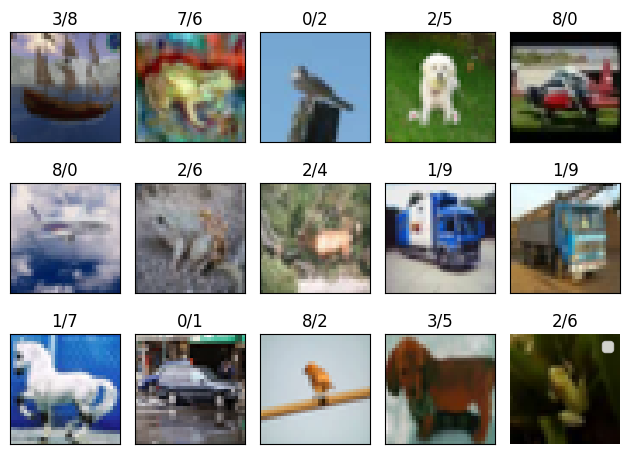

In [10]:
plot_misclassified_images(incorrect_examples, incorrect_pred, incorrect_labels)


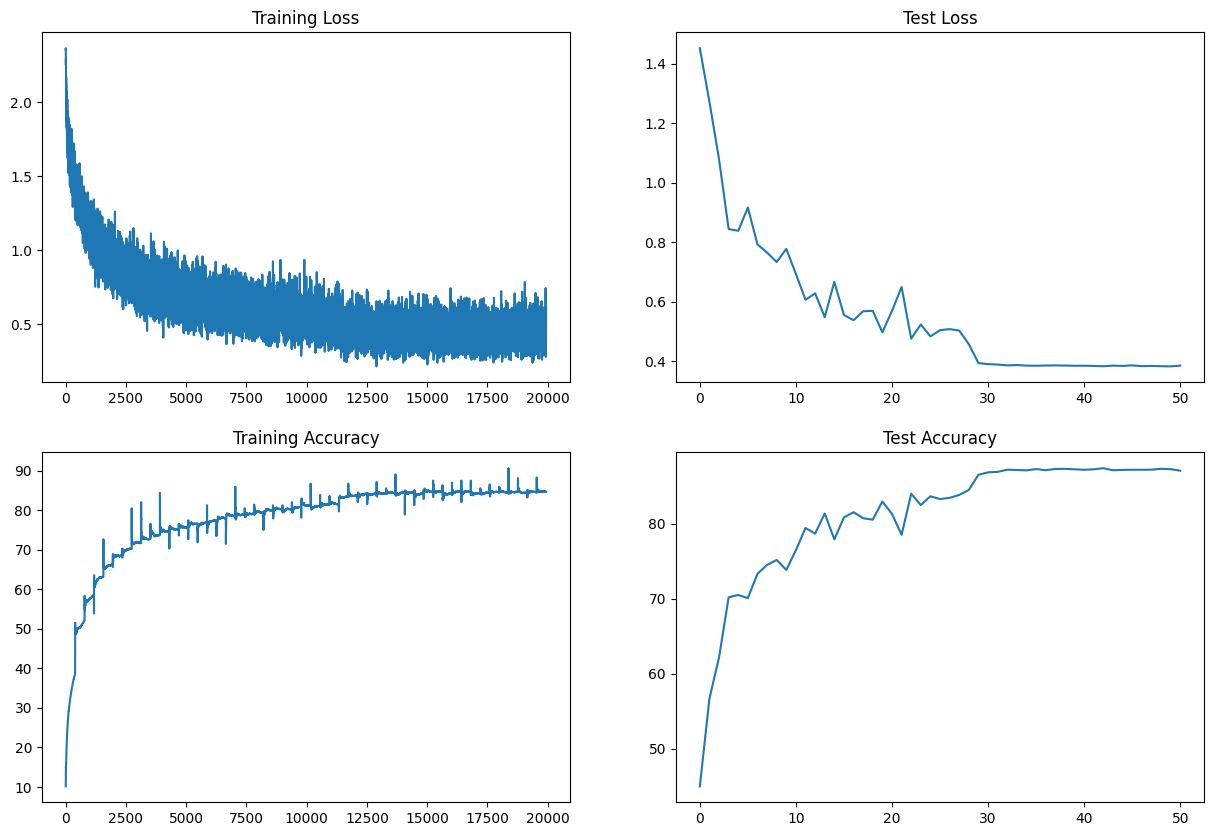

In [11]:
new_tensor = torch.tensor(train_losses, device = 'cpu')
plot_network_performance(new_tensor, test_losses, train_acc, test_acc)

In [19]:
print_train_log(EPOCHS, train_acc, test_acc, train_losses, test_losses, learning_rates)


Epoch	     Train Loss	     Test Loss     Train Accuracy    Test Accuracy    Learning Rate
1		2.35		1.45		10.1562		45.0100		0.01000000

2		2.36		1.27		11.3281		56.7100		0.01000000

3		2.35		1.08		11.1979		62.1900		0.01000000

4		2.29		0.84		11.7188		70.1900		0.01000000

5		2.32		0.84		11.8750		70.5000		0.01000000

6		2.31		0.92		12.7604		70.0800		0.01000000

7		2.25		0.79		13.9509		73.3400		0.01000000

8		2.29		0.76		14.7461		74.5000		0.01000000

9		2.27		0.73		15.2778		75.1700		0.01000000

10		2.27		0.78		14.8438		73.8400		0.01000000

11		2.27		0.69		15.2699		76.4600		0.01000000

12		2.26		0.61		15.3646		79.4300		0.01000000

13		2.25		0.63		15.5048		78.6700		0.01000000

14		2.19		0.55		16.1272		81.3600		0.01000000

15		2.21		0.67		16.0938		77.9100		0.01000000

16		2.19		0.55		16.2598		80.8300		0.01000000

17		2.13		0.54		16.3603		81.5300		0.01000000

18		2.17		0.57		16.1458		80.7300		0.01000000

19		2.05		0.57		16.4474		80.5300		0.01000000

20		2.07		0.50		16.7578		82.9500		0.01000000